1. Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity of a dataset. 

    P-value:
    
    In statistics, the p-value is the probability of obtaining results as extreme as the observed results of a statistical 
    hypothesis test, assuming that the null hypothesis is correct. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that 
    there is stronger evidence in favor of the alternative hypothesis.

    Test Statistic:
    
    A test statistic value is used in hypothesis test to decide whether to consider or reject a null hypothesis. Test stastistic compares the data from the experiment or sample to the results expected from the null hypothesis.
    Furthermore, test statistic is getting deployed in a for a different test in a machine learning, some of the commonly used tests in ML are:
      Z-Score: Used with Z-Test
      T-Score: Used with T-Test
      F-statistic: Used with ANOVA test
      Chi-square statistic: Used with Chi-Square Test

    Critical Values:
    
    Many stastical tests in machine learning returns a p-value that is used to interpret the outcome of the test. However, many tests in machine learning does not returns a p-value in the output, for an analysis it requires an alternative method for interpreting the calculated test statistic directly. A statistic calculated by a statistical hypothesis test can be interpreted using critical values from the distribution of the test statistic.

    Importance to determine stationarity of a dataset:
    
    P-value:
    
    P-value is majorly get used for stastical hypothesis testing, specifically for testing the significance of the null hypothesis. In general, if the p-value is greater than 0.05, the null hypothesis (Ho) is get accepted, which states that the data has a unit root and is non-stationary. Moreover, if the p-value is smaller than 0.05 null hypothesis is get rejected and the alternate hypothesis is get accepted, and this condition states that the data does not have a unit root and is stationary.

    ADF (Augmented Dickey Fuller) Test:
    
    Augmented Dickey Fuller test is majorly getting adopted for checking the presence of unit root in the series, through which we can determine whether the series is stationary or not. Moreover, in dickey fuller test null hypothesis, and the alternate hypothesis is used for checking the stationarity of the time series. 
    Null Hypothesis: The series has a unit root (value of a =1)
    Alternate Hypothesis: The series has no unit root.
    If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

2. Understand the ADF test mathematically.

    Dickey fuller test, tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

    The Augmented Dickey-Fuller test allows for higher-order autoregressive processes by including Δyt−p in the model. But our test is still if γ=0. 

    Δyt=α+βt+γyt−1+δ1Δyt−1+δ2Δyt−2+…

    The null hypothesis for both tests is that the data are non-stationary. We want to REJECT the null hypothesis for this test, so we want a p-value of less that 0.05 (or smaller).

3. Write about steps that can be taken to make a time-series stationary.

    Most of the financial and the economic data are not stationary, however, after the seasonal variation they will exhibit trends, cycles, random walk and other non-stationary in nature. For transforming the non-stationary time series into the stationay in nature number of techniques are majorly get used, the selection of the technique for transfomation is majorly depends on the nature of the series. For the transformation majorly the differencing and logarithmic techniques are get used. 

    Differencing:
    Under this technique the differnce of the data is taken. That is, given the series Z(t), from the given series a new series is get creted by taking the difference between the i term and the (i-1) term.  
Y(i) = Z(i) – Z(i-1)

    Usually, one differencing is sufficient to stationarize the data. However, you can difference the data more than once, if needed. Differencing a time series can remove a linear trend from it. 

    Log transformation:
    Log transformation technique is getting used to stabilize the variance of the series. Log transformation is done by applying the log finction in the given series. By applying the log function the values of th eseries are get shrinks towards the 0, however for the values that are close to 1, the shrinking is less and for the values that are higher, the shrinking is more, thus reducing the variance of the series.

4. Perform the analysis done in this week on the mean temperature dataset. Also, write in detail about the insights you found while doing the analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
cr=pd.read_csv(r"F:\Phython/test_DailyDelhiClimateTest.csv")

In [3]:
print(cr)

           date   meantemp
0    01-01-2017  15.913043
1    02-01-2017  18.500000
2    03-01-2017  17.111111
3    04-01-2017  18.700000
4    05-01-2017  18.388889
..          ...        ...
109  20-04-2017  34.500000
110  21-04-2017  34.250000
111  22-04-2017  32.900000
112  23-04-2017  32.875000
113  24-04-2017  32.000000

[114 rows x 2 columns]


In [4]:
cr = cr.drop("date", axis=1)

In [5]:
print(cr)

      meantemp
0    15.913043
1    18.500000
2    17.111111
3    18.700000
4    18.388889
..         ...
109  34.500000
110  34.250000
111  32.900000
112  32.875000
113  32.000000

[114 rows x 1 columns]


In [6]:
temps = DataFrame(cr.meantemp)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)        t+1
0          NaN  15.913043
1          NaN  18.500000
2    17.206522  17.111111
3    17.805556  18.700000
4    17.905556  18.388889


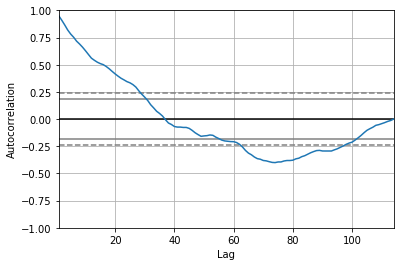

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(cr)
plt.show()

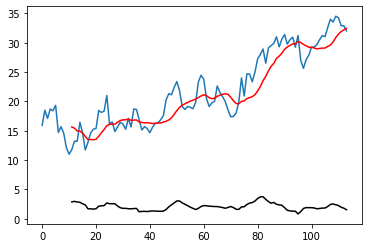

In [8]:
movingaverage=cr.rolling(window=12).mean()
movingstd=cr.rolling(window=12).std()
plt.plot(cr)
plt.plot(movingaverage, color='red')
plt.plot(movingstd, color='black')

From the above graph it is noted that standard deviation line is stationary, the moving average line is not stationary. 

In [9]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
def adfuller_test(meantemp):
    result=adfuller(meantemp)
    labels=['ADF Test statistics','p-value','#Lags used','Number of observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1] <= 0.05:
            print("data is stationary")
        else: 
                print("data is non-statinary")

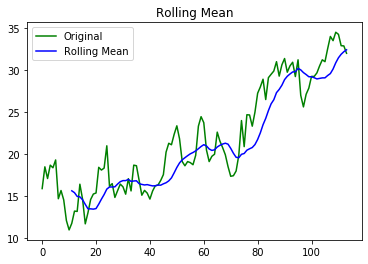

In [10]:
stationarity_check(cr)

In [11]:
adfuller_test(cr['meantemp'])

ADF Test statistics : -1.096474275690084
data is non-statinary
p-value : 0.7164758732513665
data is non-statinary
#Lags used : 0
data is non-statinary
Number of observation Used : 113
data is non-statinary


From the output of the Dickey-fuller test it is found that the given data is not stationary in nature, as the p-value is greater than 0.5  and the data is having upward trend in it.